In [24]:
import pandas as pd
from sklearn.metrics import (f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, 
roc_auc_score, precision_recall_curve)
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("classification.csv")

In [5]:
df.head()

,true,pred
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1


In [6]:
true = df["true"]
pred = df["pred"]

In [7]:
confusion_matrix(true, pred)

array([[64, 34],
       [59, 43]], dtype=int64)

In [56]:
import pandas
import sklearn.metrics as skm


def print_scores(s):
    print('\n'.join(map(lambda score: score[1] + ": " + str(score[0]), s)))


def get_max_precision(x, y):
    precision, recall, _ = skm.precision_recall_curve(x, y)
    z, _ = max(filter(lambda v: v[1] >= 0.7, zip(precision, recall)))
    return z


data = pandas.read_csv('classification.csv')

data_true = data[data.true == 1]
tp = len(data_true[data_true.pred == 1])
fn = len(data_true[data_true.pred == 0])
data_false = data[data.true == 0]
fp = len(data_false[data_false.pred == 1])
tn = len(data_false[data_false.pred == 0])
print(tp, fp, fn, tn)

43 34 59 64


In [57]:
accuracy_score = skm.accuracy_score(data.true, data.pred)
precision_score = skm.precision_score(data.true, data.pred)
recall_score = skm.recall_score(data.true, data.pred)
f1_score = skm.f1_score(data.true, data.pred)
print(' '.join(map(str, map(lambda v: round(v, 3), (accuracy_score, precision_score, recall_score, f1_score)))))

print()


0.535 0.558 0.422 0.48



In [58]:
scores_data = pandas.read_csv('scores.csv')
t = scores_data.true

scores = [(skm.roc_auc_score(t, scores_data[name]), name) for name in scores_data.columns[1:]]
print_scores(scores)
max_roc_auc, clf_name = max(scores)
print('max:', max_roc_auc, '(' + clf_name + ')')

print()

precisions = [(get_max_precision(t, scores_data[name]), name) for name in scores_data.columns[1:]]
print_scores(precisions)
max_precision, clf_name = max(precisions)
print('max:', max_precision, '(' + clf_name + ')')

score_logreg: 0.719187675070028
score_svm: 0.7086834733893557
score_knn: 0.6351540616246498
score_tree: 0.6919267707082833
max: 0.719187675070028 (score_logreg)

score_logreg: 0.6302521008403361
score_svm: 0.6228070175438597
score_knn: 0.6065573770491803
score_tree: 0.6517857142857143
max: 0.6517857142857143 (score_tree)


In [8]:
accuracy_score(true, pred)

0.535

In [9]:
precision_score(true, pred)

0.5584415584415584

In [10]:
recall_score(true, pred)

0.4215686274509804

In [11]:
f1_score(true, pred)

0.48044692737430167

In [12]:
scores = pd.read_csv("scores.csv")

In [13]:
scores.head()

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263


In [15]:
scores.columns

Index(['true', 'score_logreg', 'score_svm', 'score_knn', 'score_tree'], dtype='object')

In [16]:
cols = ['score_logreg', 'score_svm', 'score_knn', 'score_tree']

In [20]:
print("AUC-ROC\n-----------------")
for col in cols:
    print(col, ":", roc_auc_score(scores.true, scores[col]))

AUC-ROC
-----------------
score_logreg : 0.719187675070028
score_svm : 0.7086834733893557
score_knn : 0.6351540616246498
score_tree : 0.6919267707082833


Precision_Recall_curve
-----------------
78    0.630252
Name: precision, dtype: float64


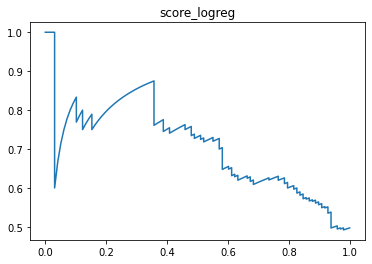

85    0.622807
Name: precision, dtype: float64


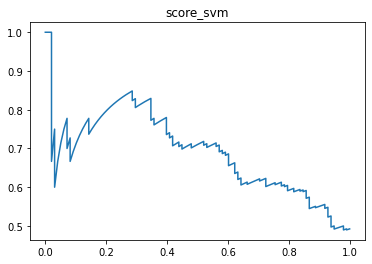

34    0.606557
Name: precision, dtype: float64


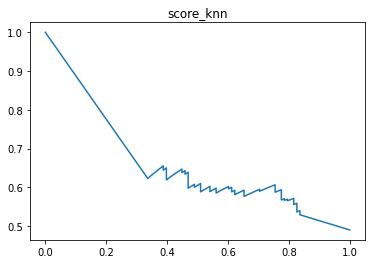

5    0.651786
Name: precision, dtype: float64


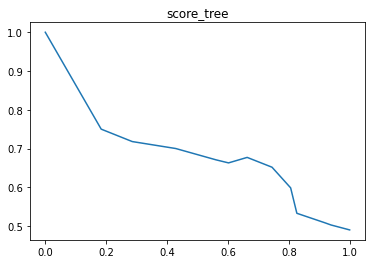

In [54]:
print("Precision_Recall_curve\n-----------------")
for col in cols:
    precision, recall, thresholds = precision_recall_curve(scores.true, scores[col])
    df_logreg = pd.DataFrame(data={"precision":precision, "recall":recall})
    print(df_logreg[df_logreg["recall"]>=0.7]["precision"].sort_values(ascending=False)[:1])
    plt.plot(recall, precision)
    plt.title(col)
    plt.show()
    #print(col, f": {}")

In [52]:
df_logreg = pd.DataFrame(data={"precision":precision_log, "recall":recall_log})
df_logreg[df_logreg["recall"]>0.7]["precision"].sort_values(ascending=False)

78    0.630252
79    0.627119
82    0.626087
74    0.626016
77    0.625000
        ...   
1     0.494898
3     0.494845
5     0.494792
7     0.494737
2     0.492308
Name: precision, Length: 86, dtype: float64